In [66]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from selenium import webdriver

In [ ]:
options = webdriver.ChromeOptions()
prefs = {"download.default_directory":"/home/henrique/workspace/ceusmar/pos-graduacao/python/repo/yahoo-finace"}

options.add_experimental_option("prefs",prefs)
driver = webdriver.Chrome(executable_path='/home/henrique/apps/chromedriver_linux64/chromedriver', chrome_options=options)

driver.get("https://sistemaswebb3-listados.b3.com.br/indexPage/day/IBOV?language=pt-br")

btn_download = driver.find_element_by_partial_link_text('Download')
btn_download.click()

time.sleep(3)

driver.close()

In [2]:
df = pd.read_csv('IBOVDia_04-01-22.csv', sep=';', skiprows=1)
df.head()

,C�digo,A��o,Tipo,Qtde. Te�rica,Part. (%)
RRRP3,3R PETROLEUM,ON NM,199.733.824,"0,345",NaN
ALPA4,ALPARGATAS,PN EJ N1,167.963.777,"0,291",NaN
ABEV3,AMBEV S/A,ON,4.359.908.680,"3,378",NaN
AMER3,AMERICANAS,ON NM,397.635.158,"0,623",NaN
ASAI3,ASSAI,ON NM,794.310.097,"0,511",NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, RRRP3 to Redutor
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   C�digo         93 non-null     object 
 1   A��o           93 non-null     object 
 2   Tipo           95 non-null     object 
 3   Qtde. Te�rica  94 non-null     object 
 4   Part. (%)      0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 4.5+ KB


In [12]:
df.index[:-2]

Index(['RRRP3', 'ALPA4', 'ABEV3', 'AMER3', 'ASAI3', 'AZUL4', 'B3SA3', 'BIDI11',
       'BPAN4', 'BBSE3', 'BRML3', 'BBDC3', 'BBDC4', 'BRAP4', 'BBAS3', 'BRKM5',
       'BRFS3', 'BPAC11', 'CRFB3', 'CCRO3', 'CMIG4', 'CIEL3', 'COGN3', 'CPLE6',
       'CSAN3', 'CPFE3', 'CMIN3', 'CVCB3', 'CYRE3', 'DXCO3', 'ECOR3', 'ELET3',
       'ELET6', 'EMBR3', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'EZTC3',
       'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'NTCO3', 'SOMA3', 'HAPV3', 'HYPE3',
       'IGTI11', 'GNDI3', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'JHSF3',
       'KLBN11', 'RENT3', 'LCAM3', 'LWSA3', 'LAME4', 'LREN3', 'MGLU3', 'MRFG3',
       'CASH3', 'BEEF3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR3', 'PETR4', 'PRIO3',
       'PETZ3', 'POSI3', 'QUAL3', 'RADL3', 'RDOR3', 'RAIL3', 'SBSP3', 'SANB11',
       'CSNA3', 'SULA11', 'SUZB3', 'TAEE11', 'VIVT3', 'TIMS3', 'TOTS3',
       'UGPA3', 'USIM5', 'VALE3', 'VIIA3', 'VBBR3', 'WEGE3', 'YDUQ3'],
      dtype='object')

In [17]:
ativos = list(df.index[:-2])
ativos = map(lambda a: f"{a}.SA", ativos)
ativos_sa = " ".join(list(ativos))

ativos_sa

'RRRP3.SA ALPA4.SA ABEV3.SA AMER3.SA ASAI3.SA AZUL4.SA B3SA3.SA BIDI11.SA BPAN4.SA BBSE3.SA BRML3.SA BBDC3.SA BBDC4.SA BRAP4.SA BBAS3.SA BRKM5.SA BRFS3.SA BPAC11.SA CRFB3.SA CCRO3.SA CMIG4.SA CIEL3.SA COGN3.SA CPLE6.SA CSAN3.SA CPFE3.SA CMIN3.SA CVCB3.SA CYRE3.SA DXCO3.SA ECOR3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA ENGI11.SA ENEV3.SA EGIE3.SA EQTL3.SA EZTC3.SA FLRY3.SA GGBR4.SA GOAU4.SA GOLL4.SA NTCO3.SA SOMA3.SA HAPV3.SA HYPE3.SA IGTI11.SA GNDI3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA JHSF3.SA KLBN11.SA RENT3.SA LCAM3.SA LWSA3.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA CASH3.SA BEEF3.SA MRVE3.SA MULT3.SA PCAR3.SA PETR3.SA PETR4.SA PRIO3.SA PETZ3.SA POSI3.SA QUAL3.SA RADL3.SA RDOR3.SA RAIL3.SA SBSP3.SA SANB11.SA CSNA3.SA SULA11.SA SUZB3.SA TAEE11.SA VIVT3.SA TIMS3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIIA3.SA VBBR3.SA WEGE3.SA YDUQ3.SA'

In [9]:
yf.pdr_override()

In [18]:
cotacoes_ativos = yf.download(tickers=ativos_sa, period='1y')

[*********************100%***********************]  93 of 93 completed


In [28]:
cotacoes_ativos['Adj Close'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2021-01-04 to 2022-01-04
Data columns (total 93 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   249 non-null    float64
 1   ALPA4.SA   249 non-null    float64
 2   AMER3.SA   249 non-null    float64
 3   ASAI3.SA   212 non-null    float64
 4   AZUL4.SA   249 non-null    float64
 5   B3SA3.SA   249 non-null    float64
 6   BBAS3.SA   249 non-null    float64
 7   BBDC3.SA   248 non-null    float64
 8   BBDC4.SA   248 non-null    float64
 9   BBSE3.SA   249 non-null    float64
 10  BEEF3.SA   249 non-null    float64
 11  BIDI11.SA  244 non-null    float64
 12  BPAC11.SA  249 non-null    float64
 13  BPAN4.SA   249 non-null    float64
 14  BRAP4.SA   249 non-null    float64
 15  BRFS3.SA   249 non-null    float64
 16  BRKM5.SA   249 non-null    float64
 17  BRML3.SA   249 non-null    float64
 18  CASH3.SA   249 non-null    float64
 19  CCRO3.SA   249 non-null    floa

In [21]:
cotacoes_ativos_fechamento = cotacoes_ativos['Adj Close']

In [27]:
# removendo NaN
cotacoes_ativos_fechamento.dropna(how='all', inplace=True)
cotacoes_ativos_fechamento.dropna(axis=1, inplace=True, thresh=248)

<ipython-input-27-9fa9b760f4d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacoes_ativos_fechamento.dropna(how='all', inplace=True)
<ipython-input-27-9fa9b760f4d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacoes_ativos_fechamento.dropna(axis=1, inplace=True, thresh=248)


In [25]:
cotacoes_ativos_fechamento.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2021-01-04 to 2022-01-04
Data columns (total 87 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   249 non-null    float64
 1   ALPA4.SA   249 non-null    float64
 2   AMER3.SA   249 non-null    float64
 3   AZUL4.SA   249 non-null    float64
 4   B3SA3.SA   249 non-null    float64
 5   BBAS3.SA   249 non-null    float64
 6   BBSE3.SA   249 non-null    float64
 7   BEEF3.SA   249 non-null    float64
 8   BPAC11.SA  249 non-null    float64
 9   BPAN4.SA   249 non-null    float64
 10  BRAP4.SA   249 non-null    float64
 11  BRFS3.SA   249 non-null    float64
 12  BRKM5.SA   249 non-null    float64
 13  BRML3.SA   249 non-null    float64
 14  CASH3.SA   249 non-null    float64
 15  CCRO3.SA   249 non-null    float64
 16  CIEL3.SA   249 non-null    float64
 17  CMIG4.SA   249 non-null    float64
 18  COGN3.SA   249 non-null    float64
 19  CPFE3.SA   249 non-null    floa

In [32]:
percentual_alteracao = cotacoes_ativos_fechamento.pct_change()
percentual_alteracao

,ABEV3.SA,ALPA4.SA,AMER3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BPAN4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.021318,0.000480,-0.022346,0.012457,0.001968,-0.010375,-0.018714,-0.019920,-0.007520,-0.004274,...,-0.022869,-0.004683,-0.008292,0.010710,0.016838,0.011442,0.003092,-0.008489,0.061378,0.005000
2021-01-06,0.020240,-0.054476,-0.065306,-0.040052,-0.016367,0.022849,-0.016297,-0.014228,-0.032258,-0.002146,...,-0.027660,-0.047412,-0.012124,0.048344,0.032796,-0.014480,-0.045006,-0.011197,0.026515,-0.039801
2021-01-07,-0.004960,-0.017767,-0.020233,-0.016908,0.027953,0.039685,0.021149,-0.005155,0.006337,0.008602,...,-0.016047,-0.002660,0.030470,0.048010,0.065278,0.018365,-0.026469,-0.025311,0.041328,0.012496
2021-01-08,0.029907,0.051680,0.069678,0.015257,0.014730,0.005814,0.031067,0.008290,0.031677,0.020256,...,0.045219,0.066667,0.025873,-0.004822,-0.003127,0.027953,0.029841,0.026196,0.060477,0.034016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,-0.000644,0.002728,-0.027273,0.003116,-0.013263,-0.005806,0.001928,0.011505,-0.035382,0.002857,...,-0.010085,-0.017008,0.003434,-0.019282,-0.024066,0.007508,0.018518,-0.004471,0.003618,0.039362
2021-12-29,-0.004510,-0.010884,-0.000322,-0.073398,-0.007168,-0.005153,-0.005772,0.006635,0.000483,0.004748,...,0.010188,-0.010642,-0.014374,0.003390,0.002596,-0.017233,0.014141,0.006044,-0.016521,-0.025887
2021-12-30,-0.001942,0.018432,0.018053,0.020956,0.005415,-0.003798,0.003870,-0.001883,0.011577,0.009452,...,0.020171,0.026891,0.009722,0.024324,0.009191,0.014218,0.045817,-0.001657,0.007330,0.011811


In [36]:
#calcula o produto acumulado
percentual_acumulado = (1 + percentual_alteracao).cumprod()
percentual_acumulado.iloc[0] = 1
percentual_acumulado

,ABEV3.SA,ALPA4.SA,AMER3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BPAN4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-01-05,1.021318,1.000480,0.977654,1.012457,1.001968,0.989625,0.981286,0.980080,0.992480,0.995726,...,0.977131,0.995317,0.991708,1.010710,1.016838,1.011442,1.003092,0.991511,1.061378,1.005000
2021-01-06,1.041990,0.945978,0.913807,0.971906,0.985569,1.012237,0.965294,0.966135,0.960464,0.993590,...,0.950104,0.948127,0.979685,1.059572,1.050186,0.996796,0.957947,0.980409,1.089520,0.965000
2021-01-07,1.036822,0.929172,0.895318,0.955473,1.013119,1.052407,0.985709,0.961155,0.966551,1.002137,...,0.934858,0.945605,1.009536,1.110442,1.118740,1.015103,0.932591,0.955594,1.134548,0.977059
2021-01-08,1.067830,0.977191,0.957702,0.970050,1.028042,1.058526,1.016332,0.969123,0.997168,1.022436,...,0.977131,1.008646,1.035655,1.105087,1.115242,1.043478,0.960421,0.980627,1.203163,1.010294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,1.046676,0.888254,0.412743,0.682481,0.579241,0.834308,0.737033,1.166418,0.904645,1.149992,...,0.915194,1.025620,0.620205,1.069190,0.991042,1.073562,0.306122,1.127105,0.902504,0.623321
2021-12-29,1.041955,0.878586,0.412610,0.632388,0.575089,0.830009,0.732779,1.174157,0.905081,1.155453,...,0.924518,1.014705,0.611290,1.072815,0.993615,1.055061,0.310451,1.133917,0.887593,0.607185
2021-12-30,1.039932,0.894780,0.420059,0.645640,0.578203,0.826856,0.735615,1.171946,0.915560,1.166374,...,0.943166,1.041992,0.617233,1.098910,1.002747,1.070061,0.324675,1.132038,0.894100,0.614356


In [59]:
# aleatoriedade
carteira = random.choices(percentual_acumulado.columns, k=5)
carteira

['AMER3.SA', 'BEEF3.SA', 'GOLL4.SA', 'PETR4.SA', 'PETZ3.SA']

In [60]:
carteira_ativos = percentual_acumulado.loc[:, carteira]
carteira_ativos = 1000 * carteira_ativos
carteira_ativos['saldo'] = carteira_ativos.sum(axis=1)
carteira_ativos['retorno'] = carteira_ativos['saldo'].pct_change()
carteira_ativos


,AMER3.SA,BEEF3.SA,GOLL4.SA,PETR4.SA,PETZ3.SA,saldo,retorno
Date,,,,,,,
2021-01-04,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000,NaN
2021-01-05,977.653627,980.079594,999.582708,1039.086826,1000.538241,4996.940996,-0.000612
2021-01-06,913.806819,966.135373,969.115200,1041.162214,949.407930,4839.627536,-0.031482
2021-01-07,895.317868,961.155271,976.627734,1072.293278,942.949451,4848.343602,0.001801
2021-01-08,957.701512,969.123413,981.218745,1076.444135,975.780395,4960.268200,0.023085
...,...,...,...,...,...,...,...
2021-12-28,412.742758,1166.418076,745.409069,1224.794604,896.955884,4446.320391,-0.004278
2021-12-29,412.609741,1174.157309,695.325563,1214.580900,884.550625,4381.224138,-0.014640
2021-12-30,420.058523,1171.946145,710.768002,1210.750750,882.932610,4396.456031,0.003477


In [57]:
ibov = yf.download('BOVA11.SA', period='1y')['Adj Close']
ibov = ibov / ibov.iloc[0]
ibov = ibov * 5000
ibov

[*********************100%***********************]  1 of 1 completed


Date
2021-01-04    5000.000000
2021-01-05    5026.295299
2021-01-06    5063.984870
2021-01-07    5187.571503
2021-01-08    5276.536304
                 ...     
2021-12-28    4428.959628
2021-12-29    4393.461444
2021-12-30    4417.565356
2022-01-03    4379.437440
2022-01-04    4368.042833
Name: Adj Close, Length: 249, dtype: float64

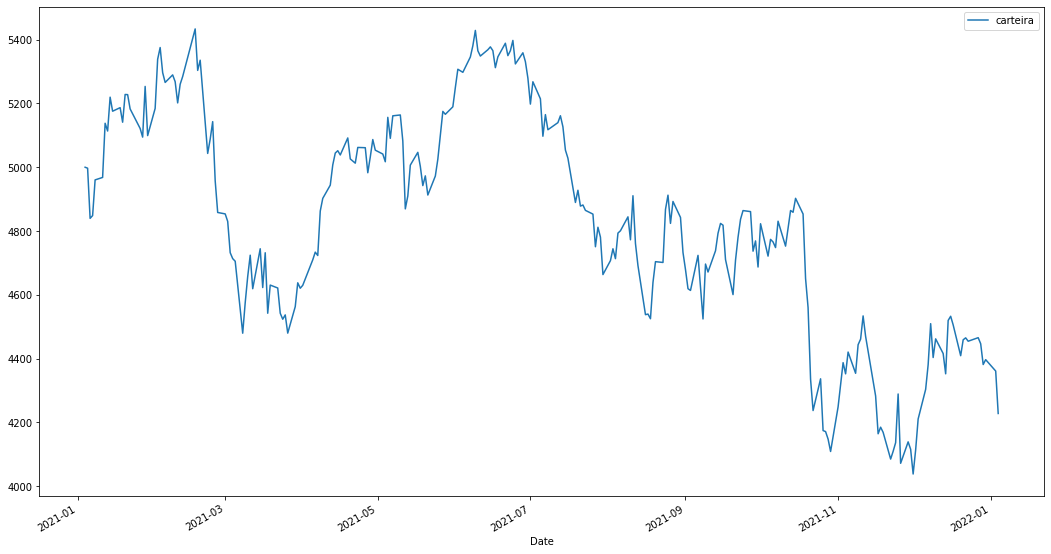

In [67]:
carteira_ativos['saldo'].plot(figsize=(18,10), label="carteira")
# ibov.plot(label='IBOV')
plt.legend()